# Exploration of Eateries in Kolkata

Riddhiman Basu 30th April, 2020

## Table of Contents

* [Introduction](#introduction_loc)
* [Problem Statement](#problem_statement)
* [Target Audience](#target_audience)
* [Data Collection from APIs](#data_collection)
* [Data Processing](#data_processing)
* [Methodology](#methodology_loc)
* [Analysis](#analysis_loc)
* [Results and Discussion](#results_discussion)
* [Conclusion](#conclusion_loc)

## Introduction <a name="introduction_loc"></a>

Kolkata is a heritage city, the former capital of India. It is also a paradise for foodies. Apart from the rich heritage Bengali food and adopted Anglo-Indian cuisines, it has also come up with various new joints, some of them part of chains and some standalone. It now offers a variety of cuisine choices from Italian to Thai, Japanese etc. A person may be curious about the rating and the price range of the restaurants in order to make a proper choice.

## Problem Statement <a name="problem_statement"></a>

This project explores various eateries in Kolkata and attributes the data based on user ratings and
average price. To explore this information, this project involves the data from both the Foursquare API
and the Zomato API to fetch complete information of various venues (including name, address,
category, rating, and price). Further, a map of the venues with specific color attributes will be plotted to
highlight their position, and information about these venues. Such plots imbibe bountiful information
in the form of their colored representations and location on the map. This enables any visitor to take
a quick glance and decide what place to visit.

## Target Audience <a name = "target_audience"></a>

The target audience is mainly tourists from abroad and other cities, as well as people who visit Kolkata
on work assignments. This analysis could help them pick out restaurants which fit their budget and also
near their current locality.
In addition, travel portals like TripAdvisor may also use such data to recommend restaurants for visitors.

## Data Collection from APIs <a name="data_collection"></a>

We will first determine the latitude and longitude of Kolkata from google. THe coordinates obtained give a central position of the city

In [1]:
TARGET_LATITUDE = 22.572645
TARGET_LONGITUDE = 88.363892
TARGET = 'Kolkata'
print('The geograpical coordinates of {} are {}, {}.'.format(TARGET, TARGET_LATITUDE, TARGET_LONGITUDE))

The geograpical coordinates of Kolkata are 22.572645, 88.363892.


Now we will create a map of Kolkata using Folium library

In [2]:
import folium

target_location_map = folium.Map(location = [TARGET_LATITUDE, TARGET_LONGITUDE], zoom_start = 13)
folium.Marker([TARGET_LATITUDE, TARGET_LONGITUDE]).add_to(target_location_map)
target_location_map.save("TargetMap.html")
target_location_map

### Foursquare API

Next we will fetch venues around a radius of 10 km from the centre of Kolkata using Foursqare API. 

In [3]:
CLIENT_ID = 'VAWXW5EBT00H3V1AN143DJRQHF3FGRF5Z1EJG44TWHPIZ3ZF' # your Foursquare ID
CLIENT_SECRET = 'Z5K3X30QBGQS15JEXAAEIR0BWIXNDH3UL0WXRZYEI1NCD4VB' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:Riddhiman')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
RADIUS = 10000 # 10 Km
NO_OF_VENUES = 100
VERSION = '20200430' # Current date

Your credentails:Riddhiman
CLIENT_ID: VAWXW5EBT00H3V1AN143DJRQHF3FGRF5Z1EJG44TWHPIZ3ZF
CLIENT_SECRET:Z5K3X30QBGQS15JEXAAEIR0BWIXNDH3UL0WXRZYEI1NCD4VB


Defining a function for fetching the correct category types

In [4]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

We'll call the API over and over till we get all venues from the API within the given distance. The maximum venues this API can fetch is 100, so we will fetch all venues by iteratively calling this API and increasing the offset each time.

* Foursquare API requires client_id, and client_secret to function which can be accessed after creating a developer account. 
* We will set the radius as 10 Kilometers. 
* The version is a required parameter which defines the date on which we are browsing so that it retrieves the latest data.

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize
import requests

pd.set_option('display.max_rows', None)

offset = 0
total_venues = 0
foursquare_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])

while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}').format(CLIENT_ID, 
                                                                        CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        TARGET_LATITUDE, 
                                                                        TARGET_LONGITUDE, 
                                                                        RADIUS,
                                                                        NO_OF_VENUES,
                                                                        offset)
    result = requests.get(url).json()
    venues_fetched = len(result['response'])
    total_venues = total_venues + venues_fetched
    print("Total {} venues fetched within a total radius of {} Km".format(venues_fetched, RADIUS/1000))

    venues = result['response']['groups'][0]['items']
    venues = pd.json_normalize(venues)

    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]

    # Filter the category for each row
    venues['venue.categories'] = venues.apply(get_category_type, axis = 1)

    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    foursquare_venues = pd.concat([foursquare_venues, venues], axis = 0, sort = False)
    
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100

foursquare_venues = foursquare_venues.reset_index(drop = True)
print("\nTotal {} venues fetched".format(total_venues))

Total 7 venues fetched within a total radius of 10.0 Km

Total 7 venues fetched


In [6]:
foursquare_venues

,name,categories,lat,lng
0,The Oberoi Grand,Hotel,22.561749,88.351594
1,Blue & Beyond,Pub,22.559131,88.353280
2,Eden Garden,Cricket Ground,22.564542,88.343296
3,Lalit Great Eastern Hotel,Hotel,22.567967,88.350010
4,Arsalan,Mughlai Restaurant,22.553897,88.354063
5,The Blue Poppy,Asian Restaurant,22.548543,88.351353
6,Girish Chandra Dey & Nakur Chandra Nandy,Indian Sweet Shop,22.596040,88.367485
7,Peter Cat,Indian Restaurant,22.552365,88.352544
8,Maidan,Field,22.549906,88.344219
9,Aqua,Lounge,22.554734,88.352180


### Zomato API

The Zomato API allows using its search API to search for any given venue based on certain search filters such as query, latitude, longitude and more. Zomato also requires a Zomato user key which can be accessed with a developer account.

We'll use the name, lat, and lng values of various venues fetched from Foursquare API to use the search API and get more information regarding each venue.

The query will be the name of the venue.
The start defines from what offset we want to start, so we'll keep it at 0.
The count defines the number of restaurants we want to fetch. As we have the exact location coordinates, we'll fetch only one.
We will supply the latitude and longitude values.
We will set the sorting criteria as real_distance so each time we get the venue we're searching based on location coordinates.

In [7]:
headers = {'user-key': '4eedf76601ee45bd257d1c6753b851c8'}
venues_information = []

for index, row in foursquare_venues.iterrows():
    print("Fetching data for venue: {}".format(index + 1))
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['name'], row['lat'], row['lng'])
    try:
        result = requests.get(url, headers = headers).json()
    except:
        print("There was an error...")
    try:
        
        if (len(result['restaurants']) > 0):
            venue.append(result['restaurants'][0]['restaurant']['name'])
            venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
            venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
            venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
            venue.append(result['restaurants'][0]['restaurant']['price_range'])
            venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
            venue.append(result['restaurants'][0]['restaurant']['location']['address'])
            venues_information.append(venue)
        else:
            venues_information.append(np.zeros(6))
    except:
        pass
        
zomato_venues = pd.DataFrame(venues_information, 
                                  columns = ['venue', 'latitude', 
                                             'longitude', 'price_for_two', 
                                             'price_range', 'rating', 'address'])

Fetching data for venue: 1
Fetching data for venue: 2
Fetching data for venue: 3
Fetching data for venue: 4
Fetching data for venue: 5
Fetching data for venue: 6
Fetching data for venue: 7
Fetching data for venue: 8
Fetching data for venue: 9
Fetching data for venue: 10
Fetching data for venue: 11
Fetching data for venue: 12
Fetching data for venue: 13
Fetching data for venue: 14
Fetching data for venue: 15
Fetching data for venue: 16
Fetching data for venue: 17
Fetching data for venue: 18
Fetching data for venue: 19
Fetching data for venue: 20
Fetching data for venue: 21
Fetching data for venue: 22
Fetching data for venue: 23
Fetching data for venue: 24
Fetching data for venue: 25
Fetching data for venue: 26
Fetching data for venue: 27
Fetching data for venue: 28
Fetching data for venue: 29
Fetching data for venue: 30
Fetching data for venue: 31
Fetching data for venue: 32
Fetching data for venue: 33
Fetching data for venue: 34
Fetching data for venue: 35
Fetching data for venue: 36
F

In [8]:
zomato_venues

,venue,latitude,longitude,price_for_two,price_range,rating,address
0,The Bar - The Oberoi Grand,22.5606509835,88.3515113220,3300.0,4.0,3.8,"The Oberoi Grand, 15, Jawaharlal Nehru Road, N..."
1,Blue And Beyond,22.5590873999,88.3532292768,1600.0,3.0,3.9,"The Lindsay, 8A & 8B, Lindsay Street, New Mark..."
2,Shree Balaji South Indian Mess Veg,22.5701528559,88.3266398683,200.0,1.0,3.5,"Shop 11, Block A2, 106 Kiran Chandra Singha Ro..."
3,The Tea Lounge - The Lalit Great Eastern,22.5679531486,88.3500418067,1500.0,3.0,3.6,"The Lalit Great Eastern, 1 - 3, Old Court Hous..."
4,Kareem's,22.5538791454,88.3543313295,1200.0,3.0,4.3,"55 B, Mirza Ghalib Street, Park Street Area, K..."
5,Biggies Burger,22.5491246340,88.3505276218,600.0,2.0,4.2,"6, Russel Street, Camac Street Area, Kolkata"
6,Nobin Chandra Das & Sons,22.5992008678,88.3661628887,100.0,1.0,3.0,"77, Jatindra Mohan Avenue, Shobha Bazar, Kolkata"
7,Peter Cat,22.5524600857,88.3526187390,1000.0,3.0,4.2,"18A, Park Street, Park Street Area, Kolkata"
8,The Pancake Centre,22.5474596648,88.3491224796,200.0,1.0,3.6,"Food Court, Metro Shopping Centre, 1 Ho Chi Mi..."
9,Aqua - The Park,22.5542185038,88.3513721824,3000.0,4.0,4.0,"The Park, 17, Park Street Area, Kolkata"


## Data Processing <a name="data_processing"></a>

We next need to combine data obtained from both APIs. For this purpose, we will first plot the two data points on the map. We'll then try to combine data points that have their latitude and longitude values very close to one another. From the remaining selected venues, we will inspect the venues to ensure that any remaining mismatched venues are also removed from the final dataset of venues before we begin any analysis.


First the Foursquare venues:

In [9]:
target_location_map = folium.Map(location = [TARGET_LATITUDE, TARGET_LONGITUDE], zoom_start = 13)

for name, latitude, longitude in zip(foursquare_venues['name'], foursquare_venues['lat'], foursquare_venues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(target_location_map)  

target_location_map.save("Venues by Foursquare.html")
target_location_map

Before plotting zomato venues need to exclude rows where venue is showing as 0

In [10]:
zomato_venues = zomato_venues[zomato_venues.venue != 0]

In [11]:
zomato_venues

,venue,latitude,longitude,price_for_two,price_range,rating,address
0,The Bar - The Oberoi Grand,22.5606509835,88.3515113220,3300.0,4.0,3.8,"The Oberoi Grand, 15, Jawaharlal Nehru Road, N..."
1,Blue And Beyond,22.5590873999,88.3532292768,1600.0,3.0,3.9,"The Lindsay, 8A & 8B, Lindsay Street, New Mark..."
2,Shree Balaji South Indian Mess Veg,22.5701528559,88.3266398683,200.0,1.0,3.5,"Shop 11, Block A2, 106 Kiran Chandra Singha Ro..."
3,The Tea Lounge - The Lalit Great Eastern,22.5679531486,88.3500418067,1500.0,3.0,3.6,"The Lalit Great Eastern, 1 - 3, Old Court Hous..."
4,Kareem's,22.5538791454,88.3543313295,1200.0,3.0,4.3,"55 B, Mirza Ghalib Street, Park Street Area, K..."
5,Biggies Burger,22.5491246340,88.3505276218,600.0,2.0,4.2,"6, Russel Street, Camac Street Area, Kolkata"
6,Nobin Chandra Das & Sons,22.5992008678,88.3661628887,100.0,1.0,3.0,"77, Jatindra Mohan Avenue, Shobha Bazar, Kolkata"
7,Peter Cat,22.5524600857,88.3526187390,1000.0,3.0,4.2,"18A, Park Street, Park Street Area, Kolkata"
8,The Pancake Centre,22.5474596648,88.3491224796,200.0,1.0,3.6,"Food Court, Metro Shopping Centre, 1 Ho Chi Mi..."
9,Aqua - The Park,22.5542185038,88.3513721824,3000.0,4.0,4.0,"The Park, 17, Park Street Area, Kolkata"


Plotting the cleaned Zomato venues:

In [12]:
target_location_map = folium.Map(location = [TARGET_LATITUDE, TARGET_LONGITUDE], zoom_start = 13)

for venue, address, latitude, longitude in zip(zomato_venues['venue'], zomato_venues['address'], 
                                               zomato_venues['latitude'], zomato_venues['longitude']):
    UPDATED_LG = float(longitude)
    UPDATED_LT = float(latitude)
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [UPDATED_LT, UPDATED_LG],
        radius = 5,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#cc3535',
        fill_opacity = 0.7,
        parse_html = False).add_to(target_location_map)  

target_location_map.save("Venues by Zomato.html")
target_location_map

We can see from the maps, that many of the venues returned from Foursquare and Zomato are overlapping. They are certainly the eateries


To combine the two datasets, we'll have to check that the latitude and longitude values of each corresponding venue match. Thus, we'll round both the latitude and longitude values upto 4 decimal places. Then, we'll calculate the difference between the corresponding latitude and longitude values and see if the difference is less than 0.0004 which should ideally mean that the two locations are same.

In [13]:
foursquare_venues['lat'] = foursquare_venues['lat'].apply(lambda lat: round(float(lat), 4))
foursquare_venues['lng'] = foursquare_venues['lng'].apply(lambda lng: round(float(lng), 4))
zomato_venues['latitude'] = zomato_venues['latitude'].apply(lambda lat: round(float(lat), 4))
zomato_venues['longitude'] = zomato_venues['longitude'].apply(lambda lng: round(float(lng), 4))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
dataset = pd.concat([foursquare_venues, zomato_venues], axis = 1)
dataset['lat_diff'] = dataset['latitude'] - dataset['lat']
dataset['lng_diff'] = dataset['longitude'] - dataset['lng']

In [15]:
selected_venues = dataset[(abs(dataset['lat_diff']) <= 0.0004) & (abs(dataset['lng_diff']) <= 0.0004)].reset_index(drop = True)
selected_venues

,name,categories,lat,lng,venue,latitude,longitude,price_for_two,price_range,rating,address,lat_diff,lng_diff
0,Blue & Beyond,Pub,22.5591,88.3533,Blue And Beyond,22.5591,88.3532,1600.0,3.0,3.9,"The Lindsay, 8A & 8B, Lindsay Street, New Mark...",0.0000,-0.0001
1,Lalit Great Eastern Hotel,Hotel,22.5680,88.3500,The Tea Lounge - The Lalit Great Eastern,22.5680,88.3500,1500.0,3.0,3.6,"The Lalit Great Eastern, 1 - 3, Old Court Hous...",0.0000,0.0000
2,Arsalan,Mughlai Restaurant,22.5539,88.3541,Kareem's,22.5539,88.3543,1200.0,3.0,4.3,"55 B, Mirza Ghalib Street, Park Street Area, K...",0.0000,0.0002
3,Peter Cat,Indian Restaurant,22.5524,88.3525,Peter Cat,22.5525,88.3526,1000.0,3.0,4.2,"18A, Park Street, Park Street Area, Kolkata",0.0001,0.0001
4,Cafe Coffee Day,Café,22.5776,88.3904,Cafe Coffee Day,22.5778,88.3904,700.0,2.0,3.7,"P-183 A, CIT Road, Scheme 6M, Kankurgachhi, Ko...",0.0002,0.0000
5,Big Boss,Chinese Restaurant,22.5465,88.3882,Big Boss,22.5469,88.3879,1300.0,3.0,3.9,"54C, Matheswartala Road, Tangra, Kolkata",0.0004,-0.0003
6,Golden Joy,Chinese Restaurant,22.5456,88.3875,Golden Joy,22.5457,88.3876,1000.0,3.0,4.1,"50/1, Matheswartala Tala Road, Near Gobinda Kh...",0.0001,0.0001
7,Beijing Restaurant,Chinese Restaurant,22.5465,88.3872,Beijing,22.5465,88.3873,1800.0,3.0,4.0,"77/1, Christopher Road, Tangra, Kolkata",0.0000,0.0001
8,INOX,Multiplex,22.5709,88.4010,KK's Fusion,22.5708,88.4012,1200.0,3.0,4.1,"89 C, Narkeldanga Main Road, Near Swabhumi, Ka...",-0.0001,0.0002
9,Jai Hind Dhaba,Dhaba,22.5331,88.3533,Jai Hind Dhaba,22.5331,88.3532,450.0,1.0,4.1,"41/1A, Sarat Bose Road, Paddapukur, Kolkata",0.0000,-0.0001


From this combined data, we can observe the following:
* Many of the restaurants show as category Shopping Mall or Multiplex etc, which means that these are associated with the malls or multiplexes.
* Very similar restaurants (Mughlai) like Arsalan and Kareem's are located very near to each other. So it would not be incorrect to consider only one, the one obtained from zomato.
* Some restaurants are incorrectly classified - like Peter Cat which is shown as an Indian restaurant but is a multicuisine restaurant. However, such cases are very less, so the margin of error is low

We'll now select the venue name from Zomato API. I'll also get the average price per person by dividing the column price_for_two by 2 and removing this column from the dataset along with other unnecessary columns.

In [16]:
selected_venues['average_price'] = selected_venues['price_for_two']/2
selected_venues = selected_venues.drop(columns = ['name', 'lat', 'lng', 'lat_diff', 'lng_diff', 'price_for_two'])

In [17]:
selected_venues

,categories,venue,latitude,longitude,price_range,rating,address,average_price
0,Pub,Blue And Beyond,22.5591,88.3532,3.0,3.9,"The Lindsay, 8A & 8B, Lindsay Street, New Mark...",800.0
1,Hotel,The Tea Lounge - The Lalit Great Eastern,22.5680,88.3500,3.0,3.6,"The Lalit Great Eastern, 1 - 3, Old Court Hous...",750.0
2,Mughlai Restaurant,Kareem's,22.5539,88.3543,3.0,4.3,"55 B, Mirza Ghalib Street, Park Street Area, K...",600.0
3,Indian Restaurant,Peter Cat,22.5525,88.3526,3.0,4.2,"18A, Park Street, Park Street Area, Kolkata",500.0
4,Café,Cafe Coffee Day,22.5778,88.3904,2.0,3.7,"P-183 A, CIT Road, Scheme 6M, Kankurgachhi, Ko...",350.0
5,Chinese Restaurant,Big Boss,22.5469,88.3879,3.0,3.9,"54C, Matheswartala Road, Tangra, Kolkata",650.0
6,Chinese Restaurant,Golden Joy,22.5457,88.3876,3.0,4.1,"50/1, Matheswartala Tala Road, Near Gobinda Kh...",500.0
7,Chinese Restaurant,Beijing,22.5465,88.3873,3.0,4.0,"77/1, Christopher Road, Tangra, Kolkata",900.0
8,Multiplex,KK's Fusion,22.5708,88.4012,3.0,4.1,"89 C, Narkeldanga Main Road, Near Swabhumi, Ka...",600.0
9,Dhaba,Jai Hind Dhaba,22.5331,88.3532,1.0,4.1,"41/1A, Sarat Bose Road, Paddapukur, Kolkata",225.0


We'll drop venues which have a rating of 0

In [18]:
selected_venues = selected_venues[selected_venues['rating'] != 0]
print("Total venues available: {}".format(selected_venues.shape[0]))

Total venues available: 45


In [19]:
selected_venues


,categories,venue,latitude,longitude,price_range,rating,address,average_price
0,Pub,Blue And Beyond,22.5591,88.3532,3.0,3.9,"The Lindsay, 8A & 8B, Lindsay Street, New Mark...",800.0
1,Hotel,The Tea Lounge - The Lalit Great Eastern,22.5680,88.3500,3.0,3.6,"The Lalit Great Eastern, 1 - 3, Old Court Hous...",750.0
2,Mughlai Restaurant,Kareem's,22.5539,88.3543,3.0,4.3,"55 B, Mirza Ghalib Street, Park Street Area, K...",600.0
3,Indian Restaurant,Peter Cat,22.5525,88.3526,3.0,4.2,"18A, Park Street, Park Street Area, Kolkata",500.0
4,Café,Cafe Coffee Day,22.5778,88.3904,2.0,3.7,"P-183 A, CIT Road, Scheme 6M, Kankurgachhi, Ko...",350.0
5,Chinese Restaurant,Big Boss,22.5469,88.3879,3.0,3.9,"54C, Matheswartala Road, Tangra, Kolkata",650.0
6,Chinese Restaurant,Golden Joy,22.5457,88.3876,3.0,4.1,"50/1, Matheswartala Tala Road, Near Gobinda Kh...",500.0
7,Chinese Restaurant,Beijing,22.5465,88.3873,3.0,4.0,"77/1, Christopher Road, Tangra, Kolkata",900.0
8,Multiplex,KK's Fusion,22.5708,88.4012,3.0,4.1,"89 C, Narkeldanga Main Road, Near Swabhumi, Ka...",600.0
9,Dhaba,Jai Hind Dhaba,22.5331,88.3532,1.0,4.1,"41/1A, Sarat Bose Road, Paddapukur, Kolkata",225.0


## Methodology <a name="methodology_loc"></a>


This project aims at identifying the venues in Kolkata based on their rating and average costs. This would enable any visitor to identify the venues he/she wants to visit based on their rating and cost preference.

As a first step, we retrieved the data from two APIs (Foursquare and Zomato). We extract venue information from the center of Kolkata, upto a distance of 10 Km. The latitude and longitude values are then used to fetch venue rating and price from Zomato.

Secondly, we then explored the data retrieved from the two APIs on the map and identified the top category types. The data from the two sources is carefully combined based on the name, latitude and longitude values from the two sources. The final dataset would include the rating and price values for each venue.

Next, we'll analyse the data that we created based on the ratings and price of each venue. We'll identify places where many venues are located so that any visitor can go to one place and enjoy the option to choose amongst many venue options. We'll also explore areas that are high rated and those that are low rated while also plotting the map of high and low priced venues. Lastly, we'll cluster the venues based on the available information of each venue. This will allow us to clearly identify which venues can be recommended and with what characteristics.

Finally, we'll discuss and conclude which venues to be explored based on visitor requirement of rating and cost.

## Analysis <a name="analysis_loc"></a>

The complete dataset is now in its final form.

We will inspect these venues based on their rating. The rating of a venue are based on user reviews and belongs to a range from 1 to 5. We'll also analyse the venues based on their price per person as well as the price range.

<h3>Categories</h3>

We have various types of venues in the final dataset. We will take a look at the venues and check which are the majority venue categories in the list.

<BarContainer object of 25 artists>

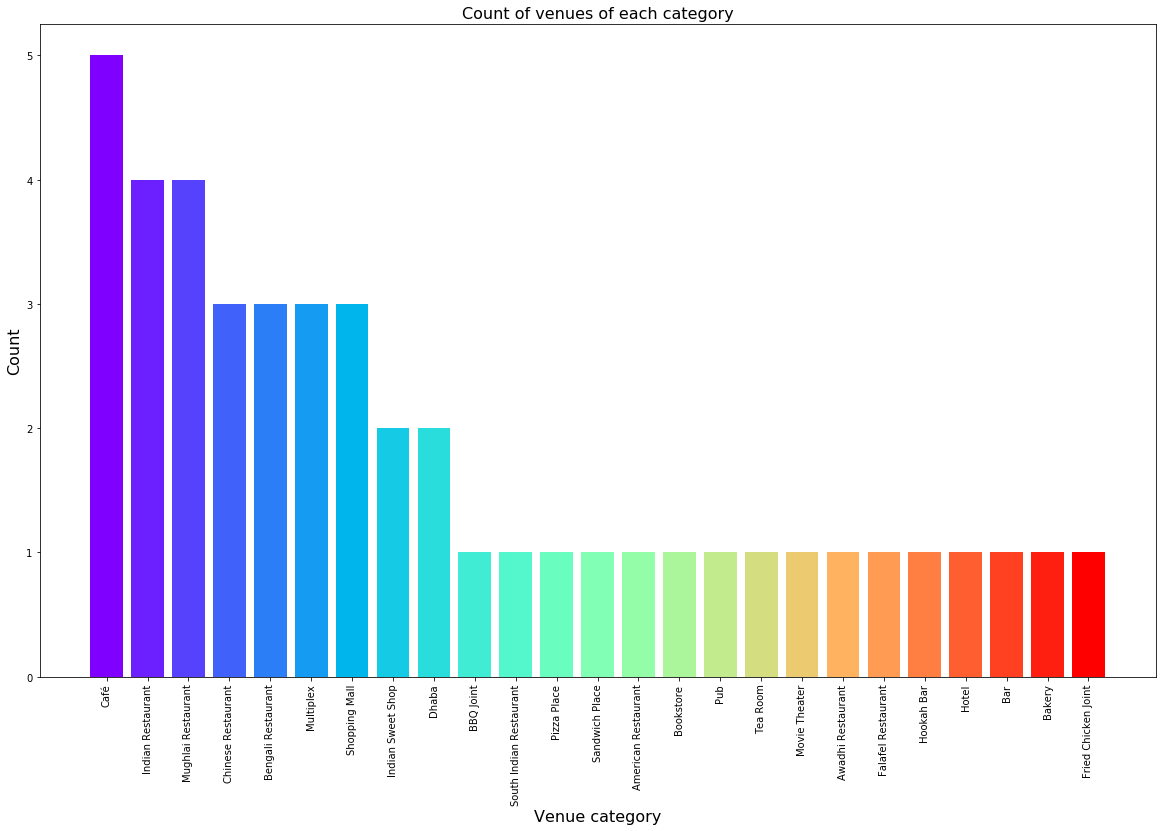

In [21]:
venue_distribution = selected_venues['categories'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

As we can see the majority categories  belong to Cafe, Indian Restaurant(North Indian) and Mughlai restaurants

<h3>Rating</h3>

Rating of a venue is an important factor on which a visitor decides whether it is worth it to visit the place. To cater to this, we will first see what is the average rating for all the venues in the city. Next, we will plot the venues on the map and color code them.

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Count of venues with given rating')

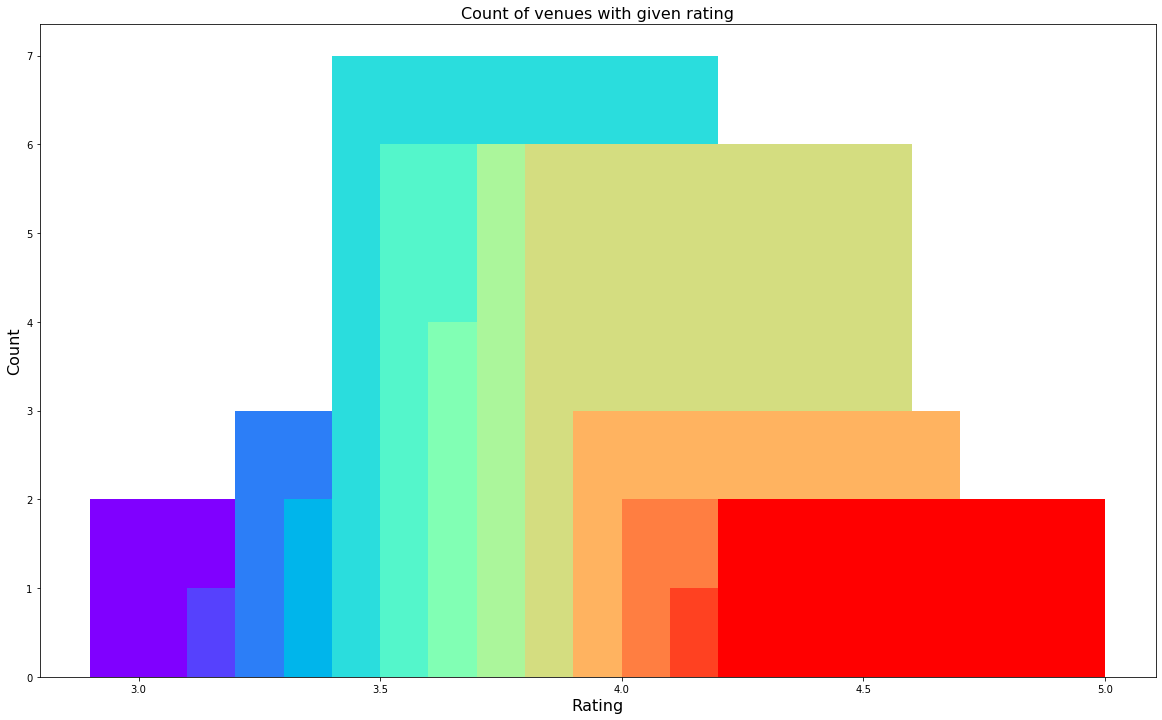

In [22]:
selected_venues['rating'] = selected_venues['rating'].astype(float)
rating = selected_venues['rating'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.bar(rating.index, rating.values, color = cm.rainbow(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues with given rating", fontsize = 16)

From the plot above, it is clear that majority venues have their rating between 3.4 and 4.2.

Let's create bins for various ratings and plot them in different colors on the map. The ratings will be divided between 4 bins:

* 1 to 2
* 2 to 3
* 3 to 4
* 4 to 5

In [23]:
bins = [1.0, 2.0, 3.0, 4.0, 5.0]
labels = ['Low', 'Okay', 'Good', 'Very good']
selected_venues['rating_bin'] = pd.cut(selected_venues['rating'].astype(float), bins = bins, labels = labels, include_lowest = True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Plotting the venues on map

In [24]:
color_map = {'Low': 'red', 'Okay': 'orange', 'Good': 'green', 'Very good': 'darkgreen'}

target_location_map = folium.Map(location = [TARGET_LATITUDE, TARGET_LONGITUDE], zoom_start = 13)

for name, address, latitude, longitude, rating_bin in zip(selected_venues['venue'], 
                                                          selected_venues['address'], 
                                                          selected_venues['latitude'], 
                                                          selected_venues['longitude'], 
                                                          selected_venues['rating_bin']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating_bin]),
        popup = label).add_to(target_location_map)  

target_location_map.save("Venues Ratings.html")
target_location_map

The map has the location of all the venues. It appears that many venues are located near about **Ripon Street**, **Ho Chi Min Sarani** in **Central Kolkata** and **Salt Lake Area** with rating above 3. If someone wants to explore new venues, they should definitely check out these areas.

### Price

We will now take a look the venues based on the price values. We have two price features for our venues, one is `average_price` which defines the average cost for one person and the other is `price_range` which determines the price range as defined by Zomato.

Text(0.5, 1.0, 'Count of venues with given average price')

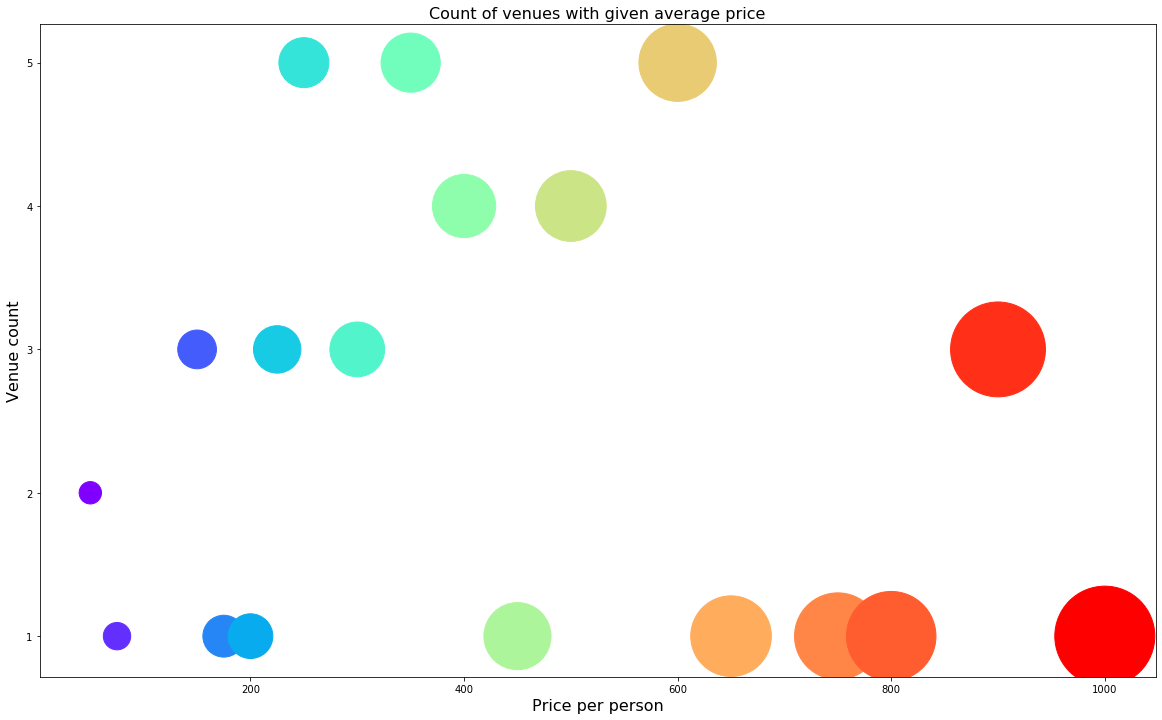

In [25]:
average_prices = selected_venues['average_price'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.scatter(average_prices.index, 
            average_prices.values, 
            s = average_prices.index*10, 
            c = cm.rainbow(np.linspace(0, 1, len(average_prices.index))))
plt.xlabel("Price per person", fontsize = 16)
plt.ylabel("Venue count", fontsize = 16)
plt.title("Count of venues with given average price", fontsize = 16)

From the plot above we can see that a large number of venues have an average price between Rs 200 and Rs 400.

Users might also be interested in going to a place that fits in their budget. We'll use the price_range column to plot the venues on a map. We'll represent the venues with lower price in green and move towards red as the price increases.

In [26]:
color_map = {'1.0': 'green', '2.0': 'darkgreen', '3.0': 'orange', '4.0': 'red'}

target_location_map = folium.Map(location = [TARGET_LATITUDE, TARGET_LONGITUDE], zoom_start = 13)

for name, address, latitude, longitude, price_range in zip(selected_venues['venue'], 
                                                           selected_venues['address'], 
                                                           selected_venues['latitude'], 
                                                           selected_venues['longitude'], 
                                                           selected_venues['price_range'].astype(str)):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[price_range]),
        popup = label).add_to(target_location_map)  

target_location_map.save("Venues Prices.html")
target_location_map

* The places near **Ho Chi Min Sarani** are mostly Moderately priced.
* The places near **Ripon Street** and **Taltala/Maidan** are mostly steeply priced.
* The places near **Salt Lake** are majorly moderately priced.
* Only one restaurant near **Kasbah North** can be seen as having very high average price.

### Clustering

We will now cluster all these venues based on their price range, location and more to identify similar venues and the relationship amongst them. We'll cluster the venues into two separate groups.

In [29]:
from sklearn.cluster import KMeans

NO_OF_CLUSTERS = 2

clustering = selected_venues.drop(['venue', 'address', 'rating_bin', 'categories'], 1)
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)
selected_venues.insert(0, 'cluster_labels', kMeans.labels_)
selected_venues

,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,0,Pub,Blue And Beyond,22.5591,88.3532,3.0,3.9,"The Lindsay, 8A & 8B, Lindsay Street, New Mark...",800.0,Good
1,0,Hotel,The Tea Lounge - The Lalit Great Eastern,22.5680,88.3500,3.0,3.6,"The Lalit Great Eastern, 1 - 3, Old Court Hous...",750.0,Good
2,0,Mughlai Restaurant,Kareem's,22.5539,88.3543,3.0,4.3,"55 B, Mirza Ghalib Street, Park Street Area, K...",600.0,Very good
3,0,Indian Restaurant,Peter Cat,22.5525,88.3526,3.0,4.2,"18A, Park Street, Park Street Area, Kolkata",500.0,Very good
4,1,Café,Cafe Coffee Day,22.5778,88.3904,2.0,3.7,"P-183 A, CIT Road, Scheme 6M, Kankurgachhi, Ko...",350.0,Good
5,0,Chinese Restaurant,Big Boss,22.5469,88.3879,3.0,3.9,"54C, Matheswartala Road, Tangra, Kolkata",650.0,Good
6,0,Chinese Restaurant,Golden Joy,22.5457,88.3876,3.0,4.1,"50/1, Matheswartala Tala Road, Near Gobinda Kh...",500.0,Very good
7,0,Chinese Restaurant,Beijing,22.5465,88.3873,3.0,4.0,"77/1, Christopher Road, Tangra, Kolkata",900.0,Good
8,0,Multiplex,KK's Fusion,22.5708,88.4012,3.0,4.1,"89 C, Narkeldanga Main Road, Near Swabhumi, Ka...",600.0,Very good
9,1,Dhaba,Jai Hind Dhaba,22.5331,88.3532,1.0,4.1,"41/1A, Sarat Bose Road, Paddapukur, Kolkata",225.0,Very good


Plotting the clusters on a map

In [31]:
target_location_map = folium.Map(location = [TARGET_LATITUDE, TARGET_LONGITUDE], zoom_start = 13)
color_map = { 0: 'green', 1: 'red'}

# add venues to the map
markers_colors = []
for venue, address, cluster, latitude, longitude in zip(selected_venues['venue'], 
                                                        selected_venues['address'], 
                                                        selected_venues['cluster_labels'], 
                                                        selected_venues['latitude'], 
                                                        selected_venues['longitude']):
    label = folium.Popup(str(venue) + ', ' + str(address), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = color_map[cluster],
        fill = True,
        fill_color = color_map[cluster],
        fill_opacity = 0.7).add_to(target_location_map)

# add cluster centers to the map
for index, cluster in enumerate(kMeans.cluster_centers_):
    latitude = cluster[0]
    longitude = cluster[1]
    label = folium.Popup("Cluster: " + str(index), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 10,
        popup = label,
        color = color_map[index],
        fill = True,
        fill_color = color_map[index],
        fill_opacity = 0.7).add_to(target_location_map)

target_location_map.save("Venues Clusters.html")
target_location_map

From the map, we see the two clusters:

The first cluster is spread across the whole city, but is the minority in numbers
The second cluster is very concentrated around Salt Lake City and Maidan
We'll also check the venues of the two clusters.

In [37]:
result0 = selected_venues[selected_venues['cluster_labels'] == 0]
print("Cluster 0")
result0.reset_index(drop = True)

Cluster 0


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,0,Pub,Blue And Beyond,22.5591,88.3532,3.0,3.9,"The Lindsay, 8A & 8B, Lindsay Street, New Mark...",800.0,Good
1,0,Hotel,The Tea Lounge - The Lalit Great Eastern,22.5680,88.3500,3.0,3.6,"The Lalit Great Eastern, 1 - 3, Old Court Hous...",750.0,Good
2,0,Mughlai Restaurant,Kareem's,22.5539,88.3543,3.0,4.3,"55 B, Mirza Ghalib Street, Park Street Area, K...",600.0,Very good
3,0,Indian Restaurant,Peter Cat,22.5525,88.3526,3.0,4.2,"18A, Park Street, Park Street Area, Kolkata",500.0,Very good
4,0,Chinese Restaurant,Big Boss,22.5469,88.3879,3.0,3.9,"54C, Matheswartala Road, Tangra, Kolkata",650.0,Good
5,0,Chinese Restaurant,Golden Joy,22.5457,88.3876,3.0,4.1,"50/1, Matheswartala Tala Road, Near Gobinda Kh...",500.0,Very good
6,0,Chinese Restaurant,Beijing,22.5465,88.3873,3.0,4.0,"77/1, Christopher Road, Tangra, Kolkata",900.0,Good
7,0,Multiplex,KK's Fusion,22.5708,88.4012,3.0,4.1,"89 C, Narkeldanga Main Road, Near Swabhumi, Ka...",600.0,Very good
8,0,Bengali Restaurant,Oh! Calcutta,22.5384,88.3513,3.0,4.4,"10/3, 4th Floor, Forum Mall, Elgin Road, Elgin...",900.0,Very good
9,0,Mughlai Restaurant,Park Pavilion - Jameson Inn Shiraz Hotel,22.5465,88.3615,3.0,3.8,"56, Park Street Area, Kolkata",600.0,Good


In [44]:
print("These venues for cluster 0 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result0['price_range'].mean(), result0['rating'].astype(float).mean()))

These venues for cluster 0 have mean price range of 3.06 and rating spread around 4.06


In [40]:
result1 = selected_venues[selected_venues['cluster_labels'] == 1]
print("Cluster 1")
result1.reset_index(drop = True)

Cluster 1


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,1,Café,Cafe Coffee Day,22.5778,88.3904,2.0,3.7,"P-183 A, CIT Road, Scheme 6M, Kankurgachhi, Ko...",350.0,Good
1,1,Dhaba,Jai Hind Dhaba,22.5331,88.3532,1.0,4.1,"41/1A, Sarat Bose Road, Paddapukur, Kolkata",225.0,Very good
2,1,Bookstore,Burgrill,22.5537,88.3518,2.0,4.2,"12B/2, Park Street Park, Opposite Oxford Book ...",250.0,Very good
3,1,BBQ Joint,Oasis,22.5532,88.3524,2.0,3.8,"33, Park Street, Park Street Area, Kolkata",450.0,Good
4,1,Café,The Rouge,22.5414,88.3595,1.0,4.0,"222, Circular Mansion, AJC Bose Road, Park Cir...",200.0,Good
5,1,Dhaba,Balwant Singh's Eating House,22.5377,88.3441,2.0,4.0,"10/B, Harish Mukherjee Road, Near Bhawanipur G...",250.0,Good
6,1,Indian Restaurant,Golbari,22.6016,88.3738,1.0,3.9,"211, A.P.C. Road, Acharya Prafulla, Chandra Ro...",175.0,Good
7,1,Indian Sweet Shop,Balaram Mullick & Radharaman Mullick Sweets,22.5332,88.3475,1.0,4.3,"2A, Paddapukur Road, Bhawanipur, Kolkata",50.0,Very good
8,1,Bengali Restaurant,Bay Bay's,22.5279,88.3686,2.0,3.7,"99/5/2A, Dr. Amiya Bose Sarani Road, Ballygung...",400.0,Good
9,1,Awadhi Restaurant,India Restaurant,22.5390,88.3222,2.0,4.5,"34, Karl Marx Sarani, Kidderpore, Kolkata",400.0,Very good


In [45]:
print("These venues for cluster 1 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result1['price_range'].mean(), result1['rating'].astype(float).mean()))

These venues for cluster 1 have mean price range of 1.62 and rating spread around 3.95


## Results and Discussion <a name="results_discussion"></a>

Based on our analysis above, we can draw a number of conclusions that will be useful to aid any visitor visiting the city of **Kolkata**, India.

After collecting data from the **Foursquare** and **Zomato APIs**, we got a list of 99 different venues. First we removed vanes which were incorrectly entered, showing as 0. Next we combined these two datasets, by checking  that the latitude and longitude values of each corresponding venue match. 
We calculated the difference between the corresponding latitude and longitude values to see if the difference was less than 0.0004, which meant that the two locations were same. This resulted in a total venue count of 45. We noticed that in some cases, even though the restaurants very close were different, they were of the same category. Hence, we could go ahead with considering only one, for which the rating was available from **Zomato API**.

We identified that from the total set of venues, majority of them were **Cafes, Mughlai Restaurants** and **Indian Restaurants**. A visitor who loves these Restaurants would surely benefit from coming to **Kolkata**.

While plotting the ratings for the eateries (a range from 1 to 5), we found that the majority venues have ratings between 3.4 and 4.2. This means that most restaurants provide good quality food, which is liked by the people of the city, thereby indicating the high rating. When we plot these venues on the map, we discover that these are concentrated around **Central Kolkata** and **Salt Lake City**.

When we take a look at the price values of each venue, we explore that many venues have prices which are in the range of Rs 200 to Rs 400 for one person. However, the variation in prices is very large, given the complete range starts from Rs 100 and goes up till Rs 1000. On plotting the venues based on their price range on the map, we discovered that venues located near **Salt Lake City** are than venues in **Central Kolkata (Ho Chi Min Sarani, Maidan, Ripon Street)**.

Finally, through clusters we identified that there are **few venues spread throughout the city as well as concentrated around Central Kolkata** which are relatively high priced and have an average rating of 4.06. On the other hand, there are **many venues concentrated around Salt Lake City** which are moderately priced and have average rating of 3.95. 

This implies that:

1. If one is looking for cheap places with moderately high ratings (close to 4.0), one should check out **Salt Lake City**.
2. If one is looking for the best places, with the highest rating but might also carry a relatively higher price tag, one has to visit **Central Kolkata, as well as may explore parts of North and South Kolkata**.

A company can use this information to build up an online website/mobile application, to provide users with up to date information about various venues in the city based on the search criteria (name, rating and price).



## Conclusion <a name="conclusion_loc"></a>

The purpose of this project was to explore the eateries that a person visiting **Kolkata** could check out. The venues have been identified using **Foursquare** and **Zomato API** and have been plotted on the map. The map reveals that there are two major areas a person can visit: **Salt Lake City** and **Central Kolkata**. Based on the visitor's venue rating and price requirements, he/she can choose amongst the two places.